<a href="https://colab.research.google.com/github/Snee21/Google-colab-projects/blob/main/Quantum_Inspired_Neural_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#step 1: Set Up Google Colab Environment


!pip install tensorflow numpy matplotlib tensornetwork

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 364.3/364.3 kB 4.0 MB/s eta 0:00:00


In [31]:
# Step 2: Import Libraries
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt


In [35]:
# Step 3: Define Quantum-Inspired MPS Layer
class QuantumLayer(tf.keras.layers.Layer):
    def __init__(self, units, activation=None):
        super(QuantumLayer, self).__init__()
        self.units = units
        self.activation = tf.keras.activations.get(activation)

    def build(self, input_shape):
        self.kernel = self.add_weight(shape=(input_shape[-1], self.units),
                                      initializer='glorot_uniform',
                                      trainable=True)
        self.bias = self.add_weight(shape=(self.units,),
                                    initializer='zeros',
                                    trainable=True)

    def call(self, inputs):
        output = tf.matmul(inputs, self.kernel) + self.bias
        if self.activation is not None:
            output = self.activation(output)
        return output

In [36]:
# Step 4: Generate Synthetic Data
def generate_synthetic_data(num_samples=1000):
    x = np.random.rand(num_samples, 2)  # 2D input data
    y = np.sin(2 * np.pi * x[:, 0]) * np.cos(2 * np.pi * x[:, 1])  # Non-linear target
    return x, y

x_data, y_data = generate_synthetic_data()

# Split into training and testing sets
train_size = int(0.8 * len(x_data))
x_train, x_test = x_data[:train_size], x_data[train_size:]
y_train, y_test = y_data[:train_size], y_data[train_size:]

print('Training data shape:', x_train.shape)
print('Testing data shape:', x_test.shape)

Training data shape: (800, 2)
Testing data shape: (200, 2)


In [37]:
# Build the model
model = Sequential([
    Dense(16, activation='relu', input_shape=(2,)),
    QuantumLayer(units=10, activation='tanh'),
    Dense(1)
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])

# Summary of the model
model.summary()


Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_23 (Dense)            (None, 16)                48        
                                                                 
 quantum_layer (QuantumLaye  (None, 10)                170       
 r)                                                              
                                                                 
 dense_24 (Dense)            (None, 1)                 11        
                                                                 
Total params: 229 (916.00 Byte)
Trainable params: 229 (916.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [38]:
# Train the model
history = model.fit(x_train, y_train, epochs=50, validation_data=(x_test, y_test))


Epoch 1/50
25/25 [==============================] - 1s 23ms/step - loss: 0.2426 - mae: 0.3967 - val_loss: 0.2544 - val_mae: 0.4085
Epoch 2/50
25/25 [==============================] - 0s 4ms/step - loss: 0.2361 - mae: 0.3892 - val_loss: 0.2469 - val_mae: 0.4028
Epoch 3/50
25/25 [==============================] - 0s 4ms/step - loss: 0.2305 - mae: 0.3839 - val_loss: 0.2423 - val_mae: 0.3982
Epoch 4/50
25/25 [==============================] - 0s 4ms/step - loss: 0.2256 - mae: 0.3791 - val_loss: 0.2379 - val_mae: 0.3941
Epoch 5/50
25/25 [==============================] - 0s 5ms/step - loss: 0.2207 - mae: 0.3748 - val_loss: 0.2322 - val_mae: 0.3893
Epoch 6/50
25/25 [==============================] - 0s 4ms/step - loss: 0.2165 - mae: 0.3714 - val_loss: 0.2279 - val_mae: 0.3857
Epoch 7/50
25/25 [==============================] - 0s 3ms/step - loss: 0.2120 - mae: 0.3674 - val_loss: 0.2223 - val_mae: 0.3814
Epoch 8/50
25/25 [==============================] - 0s 4ms/step - loss: 0.2067 - mae: 0.3

In [39]:
# Evaluate the model
test_loss, test_mae = model.evaluate(x_test, y_test)
print('Test MAE:', test_mae)

7/7 [==============================] - 0s 3ms/step - loss: 0.0963 - mae: 0.2671
Test MAE: 0.2671240568161011


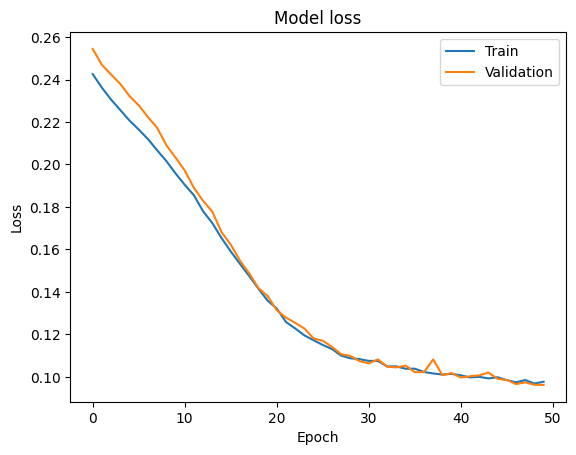

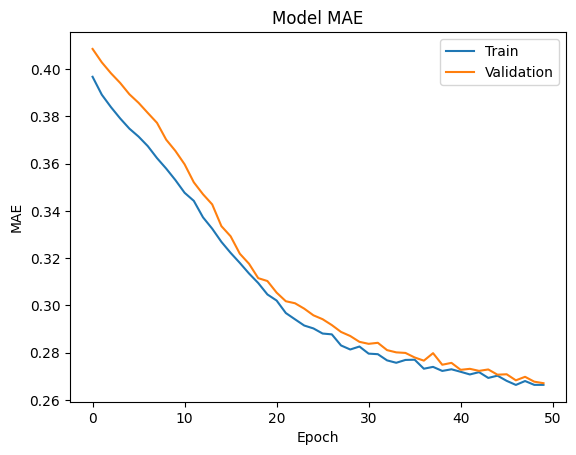

In [40]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

# Plot training & validation MAE values
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('Model MAE')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

7/7 [==============================] - 0s 4ms/step


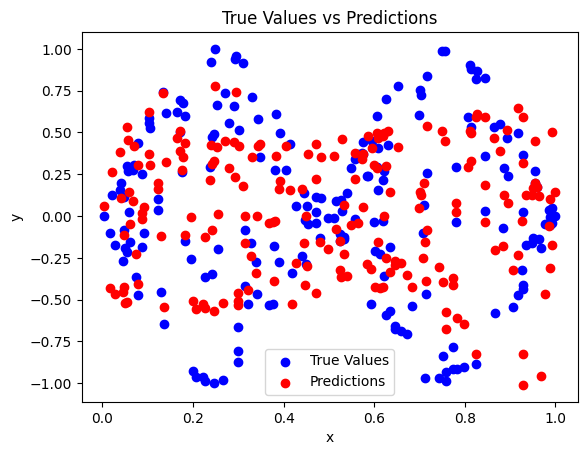

In [41]:
# Make predictions
predictions = model.predict(x_test)

# Plot predictions vs true values
plt.scatter(x_test[:, 0], y_test, color='blue', label='True Values')
plt.scatter(x_test[:, 0], predictions, color='red', label='Predictions')
plt.title('True Values vs Predictions')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()